In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Final Data\chickpea_december_left_u.csv")
df = df.drop(columns=['latitude','longitude','year_mask'])
#df = df.drop(columns=['DistrictName','latitude','longitude','year','year_mask'])

In [3]:
df = df.dropna(subset=['Yield(Tonnes/Hectare)'])

In [4]:
df['Yield(Tonnes/Hectare)'].skew()

13.32056132497699

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_5592\1820324139.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'])


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

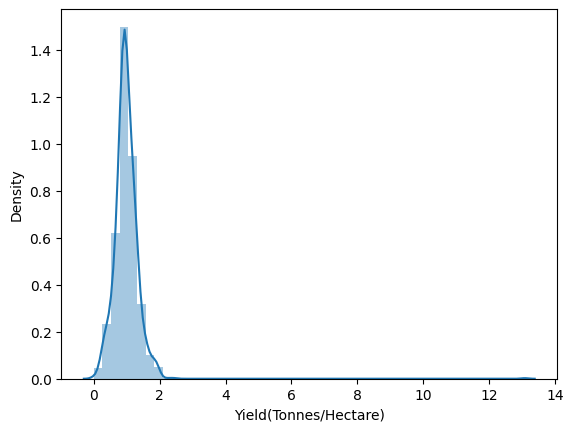

In [5]:
sns.distplot(df['Yield(Tonnes/Hectare)'])

In [6]:
df['Yield(Tonnes/Hectare)']

0       1.01
1       1.44
2       1.27
3       1.15
4       1.17
        ... 
1868    1.07
1869    1.68
1870    1.49
1871    1.13
1872    1.98
Name: Yield(Tonnes/Hectare), Length: 1573, dtype: float64

In [7]:
Q1 = df['Yield(Tonnes/Hectare)'].quantile(0.25)
Q3 = df['Yield(Tonnes/Hectare)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Yield_no_outliers'] = np.where((df['Yield(Tonnes/Hectare)'] < lower_bound) | (df['Yield(Tonnes/Hectare)'] > upper_bound), np.nan, df['Yield(Tonnes/Hectare)'])

num_points_after_handling_outliers = df['Yield_no_outliers'].count()
print("Number of points in the final DataFrame after handling outliers:", num_points_after_handling_outliers)

Number of points in the final DataFrame after handling outliers: 1514


In [8]:
df = df.dropna(subset=['Yield_no_outliers'])
df = df.drop(columns=['Yield(Tonnes/Hectare)'])

In [9]:
df.rename(columns={'Yield_no_outliers': 'Yield(Tonnes/Hectare)'}, inplace=True)

In [10]:
df['Yield(Tonnes/Hectare)'].skew()

-0.006054374458469907

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_5592\1820324139.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'])


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

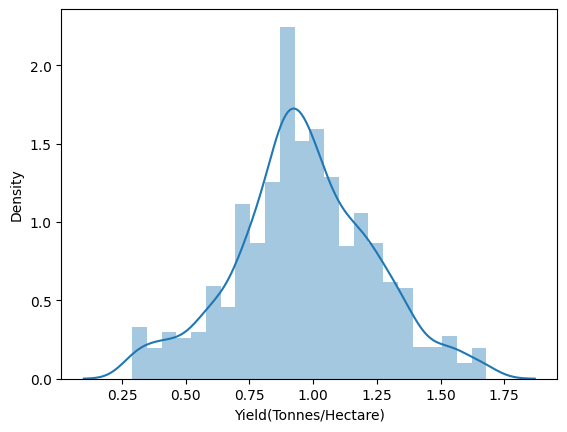

In [20]:
sns.distplot(df['Yield(Tonnes/Hectare)'])

In [11]:
df.head(10)

,DistrictName,year,countrain_11,countrain_12,countrain_1,countrain_2,countrain_3,countrain_4,rain_11,rain_12,...,tmax_2,tmax_3,tmax_4,tmin_11,tmin_12,tmin_1,tmin_2,tmin_3,tmin_4,Yield(Tonnes/Hectare)
0,agra,1997-1998,2.0,3.0,0.0,0.0,2.0,0.0,0.38328,0.740475,...,25.368722,29.469488,38.223833,13.502579,8.751011,6.851563,10.665285,14.119459,21.980359,1.01
1,agra,1998-1999,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,25.929351,33.798339,41.164534,14.315651,8.320593,6.847421,10.509494,14.957822,21.650010,1.44
2,agra,1999-2000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,24.161926,31.641251,40.054197,12.944955,7.879292,7.649347,8.792342,14.199172,21.600498,1.27
3,agra,2000-2001,0.0,0.0,0.0,0.0,0.0,1.0,0.00000,0.000000,...,26.458257,32.442054,37.920843,14.177344,7.617948,6.318537,9.743480,14.766282,20.901445,1.15
4,agra,2001-2002,0.0,0.0,2.0,2.0,0.0,0.0,0.00000,0.000000,...,24.905185,32.510479,39.663919,12.706927,8.525795,7.469724,10.348337,15.563515,22.397036,1.17
5,agra,2002-2003,0.0,1.0,0.0,3.0,1.0,0.0,0.00000,0.275913,...,24.550273,31.470160,39.331600,13.488128,9.385014,6.221103,11.350215,15.697301,22.359491,1.05
6,agra,2003-2004,0.0,1.0,2.0,0.0,0.0,1.0,0.00000,0.264522,...,26.385512,35.394744,39.667879,12.723224,9.573730,7.750162,10.189946,17.475784,24.031714,1.30
7,agra,2004-2005,0.0,0.0,0.0,1.0,2.0,0.0,0.00000,0.000000,...,25.011080,32.339190,37.401947,12.808106,9.149368,7.625321,10.660325,17.151001,20.354640,1.23
8,agra,2005-2006,0.0,0.0,0.0,0.0,1.0,0.0,0.00000,0.045274,...,30.940302,31.686791,39.145445,11.864890,6.396180,7.511860,13.911749,15.897680,22.213942,1.08
9,agra,2006-2007,0.0,0.0,0.0,7.0,5.0,0.0,0.00000,0.002127,...,25.291331,30.523088,39.803052,14.116889,9.494589,7.090520,12.184242,15.388501,23.315985,0.83


In [12]:
df.shape

(1514, 72)

In [13]:
cat_cols = ['DistrictName', 'year']
# Label encode categorical columns
encoder = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

In [14]:
df.head()

,DistrictName,year,countrain_11,countrain_12,countrain_1,countrain_2,countrain_3,countrain_4,rain_11,rain_12,...,tmax_2,tmax_3,tmax_4,tmin_11,tmin_12,tmin_1,tmin_2,tmin_3,tmin_4,Yield(Tonnes/Hectare)
0,0,0,2.0,3.0,0.0,0.0,2.0,0.0,0.38328,0.740475,...,25.368722,29.469488,38.223833,13.502579,8.751011,6.851563,10.665285,14.119459,21.980359,1.01
1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,25.929351,33.798339,41.164534,14.315651,8.320593,6.847421,10.509494,14.957822,21.650010,1.44
2,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,24.161926,31.641251,40.054197,12.944955,7.879292,7.649347,8.792342,14.199172,21.600498,1.27
3,0,3,0.0,0.0,0.0,0.0,0.0,1.0,0.00000,0.000000,...,26.458257,32.442054,37.920843,14.177344,7.617948,6.318537,9.743480,14.766282,20.901445,1.15
4,0,4,0.0,0.0,2.0,2.0,0.0,0.0,0.00000,0.000000,...,24.905185,32.510479,39.663919,12.706927,8.525795,7.469724,10.348337,15.563515,22.397036,1.17


In [15]:
df.shape

(1514, 72)

In [16]:
df.columns

Index(['DistrictName', 'year', 'countrain_11', 'countrain_12', 'countrain_1',
       'countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12',
       'rain_1', 'rain_2', 'rain_3', 'rain_4', 'ssr_11', 'ssr_1', 'ssr_2',
       'ssr_3', 'ssr_4', 'stl1_11', 'stl1_1', 'stl1_2', 'stl1_3', 'stl1_4',
       'stl2_11', 'stl2_1', 'stl2_2', 'stl2_3', 'stl2_4', 'stl3_11', 'stl3_1',
       'stl3_2', 'stl3_3', 'stl3_4', 'stl4_11', 'stl4_1', 'stl4_2', 'stl4_3',
       'stl4_4', 'swvl1_11', 'swvl1_1', 'swvl1_2', 'swvl1_3', 'swvl1_4',
       'swvl2_11', 'swvl2_1', 'swvl2_2', 'swvl2_3', 'swvl2_4', 'swvl3_11',
       'swvl3_1', 'swvl3_2', 'swvl3_3', 'swvl3_4', 'swvl4_11', 'swvl4_1',
       'swvl4_2', 'swvl4_3', 'swvl4_4', 'tmax_11', 'tmax_12', 'tmax_1',
       'tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2',
       'tmin_3', 'tmin_4', 'Yield(Tonnes/Hectare)'],
      dtype='object')

In [17]:
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [ ]:
#df = df[['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4','Yield(Tonnes/Hectare)']]

In [ ]:
#df = df.drop(columns=['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4'])

In [ ]:
df.shape

In [18]:
X = df.drop('Yield(Tonnes/Hectare)', axis=1)  # Features
y = df['Yield(Tonnes/Hectare)']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
duplicate_columns = get_duplicate_columns(X_train)

In [ ]:
duplicate_columns

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
#scaler = StandardScaler()
# Fit and transform the training data
#X_train_scaled = scaler.fit_transform(X_train)
# Transform the testing data using the same scaler
#X_test_scaled = scaler.transform(X_test)

#X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
#X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
import seaborn as sns
corr_matrix = X_train.corr()

# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []
# Create a dictionary to store highly correlated features
highly_correlated_features = {}

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.90:
            # Add the column to drop
            columns_to_drop.append(columns[j])
            # Update the dictionary with highly correlated features
            if columns[i] in highly_correlated_features:
                highly_correlated_features[columns[i]].append(columns[j])
            else:
                highly_correlated_features[columns[i]] = [columns[j]]


print(len(columns_to_drop))

In [ ]:
print(columns_to_drop)

In [ ]:
print("Highly correlated features:")
for key, value in highly_correlated_features.items():
    print(key, ":", value)

In [ ]:
columns_to_drop = set(columns_to_drop)
print(columns_to_drop)

In [ ]:
len(columns_to_drop)

In [ ]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score



# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}')


Training Linear Regression...
Linear Regression - Mean Squared Error: 0.05, R^2 Score: 0.41
Training Ridge Regression...
Ridge Regression - Mean Squared Error: 0.05, R^2 Score: 0.35
Training Lasso Regression...
Lasso Regression - Mean Squared Error: 0.07, R^2 Score: 0.07
Training Decision Tree...
Decision Tree - Mean Squared Error: 0.06, R^2 Score: 0.29
Training Gradient Boosting...
Gradient Boosting - Mean Squared Error: 0.03, R^2 Score: 0.62
Training Random Forest...
Random Forest - Mean Squared Error: 0.03, R^2 Score: 0.64
Training Support Vector Machine...
Support Vector Machine - Mean Squared Error: 0.07, R^2 Score: 0.06
